Progetto finale - Modulo Python - Francesca Parri

• Si richiede di verificare le dimensioni del dataset e i relativi metadati; Download our complete COVID-19 

In [1]:
#Per poter leggere un file excel mi serve importare la libreria pandas
import pandas as pd
import numpy as np

In [2]:
#Per leggere il file in formato .xlsx uso la funzione pd.read_excel e gli passo l'indirizzo assoluto del file
tab_raw_excel=pd.read_excel("C:\\Users\\fra_p\\OneDrive\\Desktop\\CORSO\PYTHON\\esame finale\\owid-covid-data.xlsx")

In [3]:
#Per farmi una prima idea di come è fatto il DataFrame posso usare .head(),.tail() o .sample()
tab_raw_excel.head(5)
tab_raw_excel.tail(5)
tab_raw_excel.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
127329,GAB,Africa,Gabon,2023-07-09,48992.0,0.0,0.0,307.0,0.0,0.000,...,NaN,NaN,6.30,66.47,0.703,2388997.0,NaN,NaN,NaN,NaN
391074,VEN,South America,Venezuela,2021-11-25,423633.0,0.0,805.0,5066.0,0.0,8.000,...,NaN,NaN,0.80,72.06,0.711,28301700.0,NaN,NaN,NaN,NaN
8701,AND,Europe,Andorra,2021-12-21,20549.0,0.0,158429.0,134.0,0.0,0.143,...,37.8,NaN,NaN,83.73,0.868,79843.0,NaN,NaN,NaN,NaN
49584,VGB,North America,British Virgin Islands,2020-02-18,NaN,0.0,0.0,NaN,0.0,0.000,...,NaN,NaN,NaN,79.07,NaN,31332.0,NaN,NaN,NaN,NaN
72040,COL,South America,Colombia,2020-04-29,4881.0,0.0,206.0,225.0,0.0,10286.000,...,13.5,65386.0,1.71,77.29,0.767,51874028.0,NaN,NaN,NaN,NaN


In [4]:
#Uso  il metodo .shape per avere come risultato la tupla che contiene il numero di righe e di colonne del dataframe
dim_tab_raw=tab_raw_excel.shape

#La tupla è ordinata e il primo elemento è sempre il numero di righe, mentre il secono il numero di colonne
righe=dim_tab_raw[0]
colonne=dim_tab_raw[1]
print(f"Il DataFrame importato ha:\n -- {righe} righe\n -- {colonne} colonne")

Il DataFrame importato ha:
 -- 402778 righe
 -- 67 colonne


In [5]:
#Uso  il metodo .info per avere le prime informazioni sul contenuto delle colonne
info_tab_raw=tab_raw_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402778 entries, 0 to 402777
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    402778 non-null  object        
 1   continent                                   383491 non-null  object        
 2   location                                    402778 non-null  object        
 3   date                                        402778 non-null  datetime64[ns]
 4   total_cases                                 363712 non-null  float64       
 5   new_cases                                   391526 non-null  float64       
 6   new_cases_smoothed                          390296 non-null  float64       
 7   total_deaths                                341117 non-null  float64       
 8   new_deaths                                  391897 non-null  float64      

In [50]:
#info2_tab_raw=tab_raw_excel.describe()
#print(info2_tab_raw)
info3_tab_raw=tab_raw_excel.nunique()
print(info3_tab_raw)

iso_code                                     255
continent                                      6
location                                     255
date                                        1617
total_cases                                35732
                                           ...  
excess_mortality_cumulative                 4200
excess_mortality                            5423
excess_mortality_cumulative_per_million    13218
year                                           5
month                                         12
Length: 69, dtype: int64


In [7]:
mask_duplicati=tab_raw_excel.duplicated()
print(len(mask_duplicati))

402778


• Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [8]:
#In questo caso ho pensato di utilizzare la funzione .groupby(), raggruppando per continente.
#Applico poi la funzione .sum() per sommare, per singolo continente, tutti i "new_cases".
#Non a senso applicare il .sum() a "total_cases" perché questo è già un contatore per il singolo stato del continente
casi_tot_cont=tab_raw_excel.groupby("continent")["new_cases"].sum()
lista_cont=casi_tot_cont.index
print(casi_tot_cont)

continent
Africa            13144001.0
Asia             301493807.0
Europe           252591016.0
North America    124570370.0
Oceania           14951880.0
South America     68838753.0
Name: new_cases, dtype: float64


• Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [38]:
var_continente_1="North America"
var_continente_2="Europe"
#var_continente_3="Asia"
'''
Trovo il totale dei casi del mondo sommando il totale dei continenti.
Faccio un ciclo for usando gli indici in "lista_cont" per accedere alle somme già fatte in casi_tot_cont
'''
casi_tot_mondo=0
for i in lista_cont:
    casi_tot_mondo+=casi_tot_cont[i]
#print(casi_tot_mondo)
print(f"\nI casi totali nel mondo sono: {casi_tot_mondo} ovvero {casi_tot_mondo/1000000} milioni")

#Per calcolarmi 

casi_tot_cont_max=tab_raw_excel.groupby("location")["total_cases"].max()
casi_tot_cont_max.reset_index()
casi_tot_cont_mean=tab_raw_excel.groupby("location")["total_cases"].mean()
casi_tot_cont_mean.reset_index()
#print(casi_tot_cont_max)
#print(casi_tot_cont_mean)

print(f"\nPer il continente {var_continente_1}:\nIl massimo dei casi tot è: {casi_tot_cont_max[var_continente_1]} ovvero {casi_tot_cont_max[var_continente_1]/1000000} milioni \nLa media dei casi tot è: {casi_tot_cont_mean[var_continente_1]} ovvero {casi_tot_cont_mean[var_continente_1]/1000000} \nLa percentuale rispetto al casi totali mondiali è: {casi_tot_cont_max[var_continente_1]/casi_tot_mondo*100}")
print(f"\nPer il continente {var_continente_2}:\nIl massimo dei casi tot è: {casi_tot_cont_max[var_continente_2]} ovvero {casi_tot_cont_max[var_continente_2]/1000000} milioni \nLa media dei casi tot è: {casi_tot_cont_mean[var_continente_2]} ovvero {casi_tot_cont_mean[var_continente_2]/1000000} \nLa percentuale rispetto al casi totali mondiali è: {casi_tot_cont_max[var_continente_2]/casi_tot_mondo*100}")
#print(f"\nPer il continente {var_continente_3}:\nIl massimo dei casi tot è: {casi_tot_cont_max[var_continente_3]} ovvero {casi_tot_cont_max[var_continente_3]/1000000} milioni \nLa media dei casi tot è: {casi_tot_cont_mean[var_continente_3]} ovvero {casi_tot_cont_mean[var_continente_3]/1000000} \nLa percentuale rispetto al casi totali mondiali è: {casi_tot_cont_max[var_continente_3]/casi_tot_mondo*100}")



I casi totali nel mondo sono: 775589827.0 ovvero 775.589827 milioni

Per il continente North America:
Il massimo dei casi tot è: 124564831.0 ovvero 124.564831 milioni 
La media dei casi tot è: 74563923.30583756 ovvero 74.56392330583756 
La percentuale rispetto al casi totali mondiali è: 16.060658180860848

Per il continente Europe:
Il massimo dei casi tot è: 252591016.0 ovvero 252.591016 milioni 
La media dei casi tot è: 136065837.24608642 ovvero 136.06583724608643 
La percentuale rispetto al casi totali mondiali è: 32.56760303020323


Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali; 

5622431.0


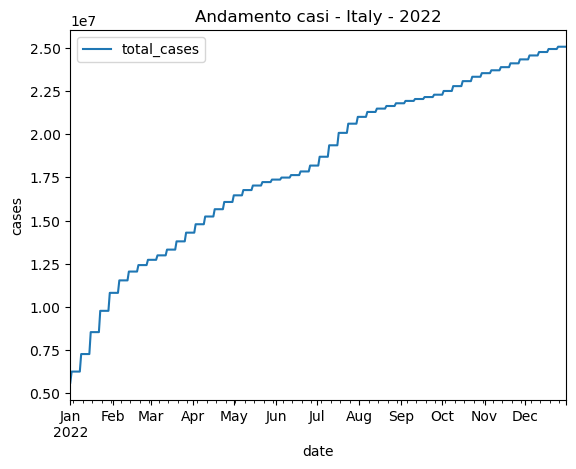

In [10]:
#Creo una copia del Dataframe
df_nc=tab_raw_excel

#Inserisco una colonna che estrae l'anno dalla colonna "date"
df_nc["year"]=df_nc["date"].dt.year

#Creo un DataFrame dove posso filtrare per anno e location, utilizzando gli indici
df_nc=df_nc.set_index(["location","year"])

df_nc_Italy_2022=df_nc.loc["Italy",2022]
df_nc_Italy_2022=df_nc_Italy_2022.set_index("date")

#Creo un DataFrame filtrando per anno "2022"
df_nc_Italy_2022["total_cases"].plot(title="Andamento casi - Italy - 2022", xlabel="date", ylabel="cases",  legend="bool")

#Verifico il numero di partenza della curva "total_cases"
print(df_nc_Italy_2022["total_cases"].iloc[0])

<Axes: title={'center': 'Andamento casi - Italy - 2022'}, xlabel='date'>

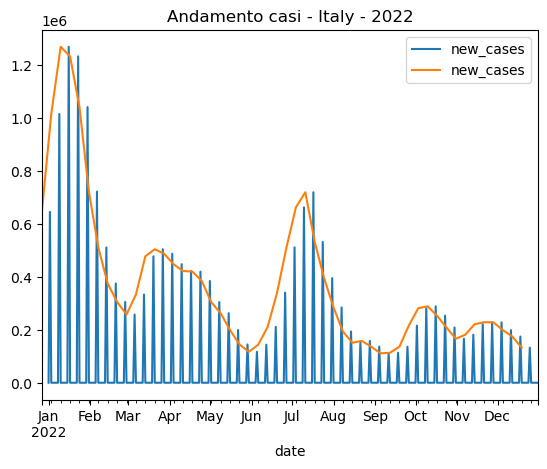

In [49]:
df_nc_Italy_2022["new_cases"].plot( legend="bool", title="Andamento casi - Italy - 2022")

#Osservo che ci sono molti dati nulli in "new_cases". Uso quindi una mask per filtrare solo quelli >0
mask_new_cases=df_nc_Italy_2022["new_cases"] > 0
#print(mask_new_cases)
df_nc_Italy_2022_filtrato=df_nc_Italy_2022[mask_new_cases]
#print(df_nc_Italy_2022_filtrato)
df_nc_Italy_2022_filtrato["new_cases"].plot( legend="bool", title="Andamento casi - Italy - 2022")

Ho lasciato i due grafici sovrapposti così che si possa apprezzare la differenza tra con e senza maschera di filtraggio


5622431.0
5622431.0
5622431.0


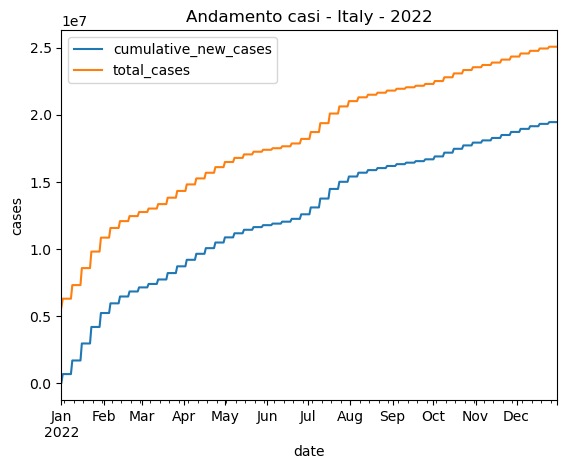

In [12]:
#Mi creo la colonna cumulativa da aggiungere al DataFrame
cumulative_new_cases=[]
var=0
for i in range(len(df_nc_Italy_2022["new_cases"])):
    var=var + df_nc_Italy_2022["new_cases"].iloc[i]
    cumulative_new_cases.append(var)
#print(len(cumulative_new_cases))
#Trasformo la lista in un dataframe Pandas e uso concat per unire cumulative_new_cases al dataframe precedente
df_nc_da_unire = pd.DataFrame(cumulative_new_cases)
df_nc_Italy_2022_2=df_nc_Italy_2022.reset_index()
df_nc_Italy_2022_2["cumulative_new_cases"]=df_nc_da_unire
df_nc_Italy_2022_fin=df_nc_Italy_2022_2.set_index("date")
df_nc_Italy_2022_fin["cumulative_new_cases"].plot(title="Andamento casi - Italy - 2022",xlabel="date", ylabel="cases", legend="bool")
df_nc_Italy_2022["total_cases"].plot(legend="bool")

#Verifico per 3 punti che la differenza tra le due curve è sempre pari al numero di partenza della curva "total_cases" (5622431)
print(df_nc_Italy_2022["total_cases"].iloc[10]-df_nc_Italy_2022_fin["cumulative_new_cases"].iloc[10])
print(df_nc_Italy_2022["total_cases"].iloc[70]-df_nc_Italy_2022_fin["cumulative_new_cases"].iloc[70])
print(df_nc_Italy_2022["total_cases"].iloc[250]-df_nc_Italy_2022_fin["cumulative_new_cases"].iloc[250])


Dal grafico creato si osserva che l'andamento della curva dei "cumulative_new_cases" è il medesimo di quello dei "total_cases". Le due curve non coincidono perché i "total_cases" partono da 5622431 casi, mentre la mia "cumulative_new_cases" parte da 0. Ho verificato per 3 punti che tale differenza si mantiene.
Potrei sommare 562231 a "cumulative_new_cases" e vedere che le due curve coincidono.

<Axes: title={'center': 'Andamento casi - Italy - 2022'}, xlabel='date', ylabel='cases'>

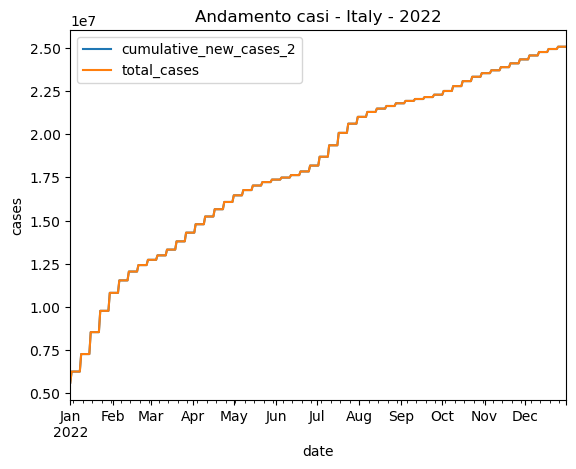

In [58]:
cumulative_new_cases_2=[]
var_2=5622431
for i in range(len(df_nc_Italy_2022["new_cases"])):
    var_2=var_2 + df_nc_Italy_2022["new_cases"].iloc[i]
    cumulative_new_cases_2.append(var_2)
#print(len(cumulative_new_cases))

#Trasformo la lista in un dataframe Pandas e uso concat per unire cumulative_new_cases al dataframe precedente
df_nc_da_unire_2 = pd.DataFrame(cumulative_new_cases_2)
df_nc_Italy_2022_3=df_nc_Italy_2022.reset_index()
df_nc_Italy_2022_3["cumulative_new_cases_2"]=df_nc_da_unire_2
df_nc_Italy_2022_fin_2=df_nc_Italy_2022_3.set_index("date")
df_nc_Italy_2022_fin_2["cumulative_new_cases_2"].plot(title="Andamento casi - Italy - 2022",xlabel="date", ylabel="cases", legend="bool")
df_nc_Italy_2022["total_cases"].plot(legend="bool")


In [ ]:
Le due curve coincidono!

• Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

In [13]:
#Faccio una copia del DataFrame, inserisco una colonna per l'anno e uno per il mese
df=tab_raw_excel
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month

#Rendo "location" e "year" gli indici del mio DataFrame, che diventerà quindi un DataFrame multindex, per poter filtrare grazie a .loc()
df=df.set_index(["location","year"])

ITALIA

In [14]:
#Filtro per location "Italy" e anni "2022" e "2023"
df_Italy_2022=df.loc["Italy",2022]
df_Italy_2023=df.loc["Italy",2023]

#Ora setto i "month" come indici
df_Italy_2022_mo=df_Italy_2022.set_index("month")
df_Italy_2023_mo=df_Italy_2023.set_index("month")

#Utilizzo lo slicing per ottenere solo i mesi da maggio a dicembre per il 2022 e da gennaio ad aprile per il 2023
df_Italy_2022_mo=df_Italy_2022_mo.loc[5:12]
df_Italy_2023_mo=df_Italy_2023_mo.loc[1:4]

#print(df_Italy_2022_mo)
#print(df_Italy_2023_mo)

df_Italy_2022_2023=pd.concat([df_Italy_2022_mo,df_Italy_2023_mo]) 
#print(df_Italy_2022_2023)

GERMANIA

In [15]:
#Filtro perlocation "Germany" e anni "2022" e "2023"
df_Germany_2022=df.loc["Germany",2022]
df_Germany_2023=df.loc["Germany",2023]

#Ora setto i "month" come indici
df_Germany_2022_mo=df_Germany_2022.set_index("month")
df_Germany_2023_mo=df_Germany_2023.set_index("month")

#Utilizzo lo slicing per ottenere solo i mesi da maggio a dicembre per il 2022 e da gennaio ad aprile per il 2023
df_Germany_2022_mo=df_Germany_2022_mo.loc[5:12]
df_Germany_2023_mo=df_Germany_2023_mo.loc[1:4]

#print(df_Germany_2022_mo)
#print(df_Germany_2023_mo)

df_Germany_2022_2023=pd.concat([df_Germany_2022_mo,df_Germany_2023_mo]) 
#print(df_Germany_2022_2023)

FRANCIA

In [16]:
#Filtro perlocation "France" e anni "2022" e "2023"
df_France_2022=df.loc["France",2022]
df_France_2023=df.loc["France",2023]

#Ora setto i "month" come indici
df_France_2022_mo=df_France_2022.set_index("month")
df_France_2023_mo=df_France_2023.set_index("month")

#Utilizzo lo slicing per ottenere solo i mesi da maggio a dicembre per il 2022 e da gennaio ad aprile per il 2023
df_France_2022_mo=df_France_2022_mo.loc[5:12]
df_France_2023_mo=df_France_2023_mo.loc[1:4]

#print(df_France_2022_mo)
#print(df_France_2023_mo)

df_France_2022_2023=pd.concat([df_France_2022_mo,df_France_2023_mo]) 
#print(df_France_2022_2023)

Text(0.5, 1.0, 'ICU patients on a given day\nITA-DEU-FRA')

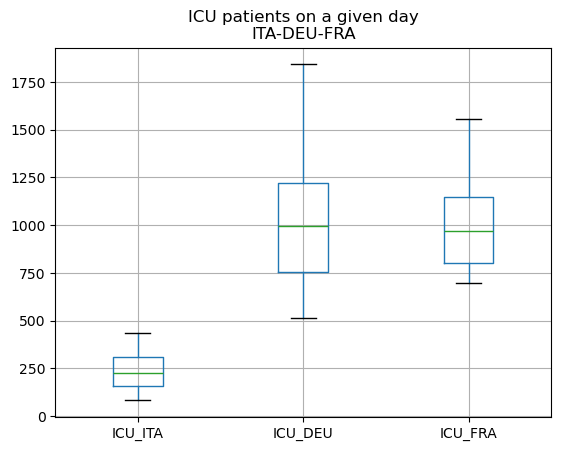

In [17]:
'''
icu_patients = Number of COVID-19 patients in intensive care units (ICUs) on a given day
'''
df_ITA_ICU=df_Italy_2022_2023[["date","iso_code","icu_patients"]].set_index("date")
df_DEU_ICU=df_Germany_2022_2023[["date","iso_code","icu_patients"]].set_index("date")
df_FRA_ICU=df_France_2022_2023[["date","iso_code","icu_patients"]].set_index("date")
#print(df_ITA_ICU)
#print(df_DEU_ICU)
#print(df_FRA_ICU)
df_tot=pd.concat([df_ITA_ICU,df_DEU_ICU,df_FRA_ICU],axis=1)
df_tot.columns=["iso_code_ITA","ICU_ITA","iso_code_DEU","ICU_DEU","iso_code_FRA","ICU_FRA"]
#print(df_tot)
df_tot.boxplot(column=["ICU_ITA", "ICU_DEU","ICU_FRA"]).set_title("ICU patients on a given day\nITA-DEU-FRA")

ICU_ITA: la mediana è di poco inferiore ai 250 pazienti al giorno (linea verde) e il 25° e il 75° percentile non sono molto distanti (delimitazione del quadrato blu). I due baffi rappresentano "l'ampiezza" raggiunta dai dati, tra minimo e massimo. La curva di distribuzione sembra abbastanza simmetrica.
ICU_DEU e ICU_FRA: la mediana è piuttosto simile, attorno a 1000 pazienti al giorno. La Germania ha una "pancia" della curva di distribuzione più ampia (quadrato più ampio, ovvero distanza maggiore tra il 25° e il 75° percentile), mentre la Francia ha una distribuzione con "pancia" più stretta attorno alla mediana. In entrambi i casi le due curve non sembrano simmetriche

Text(0.5, 1.0, 'ICU patients on a given day per 1,000,000 people\nITA-DEU-FRA')

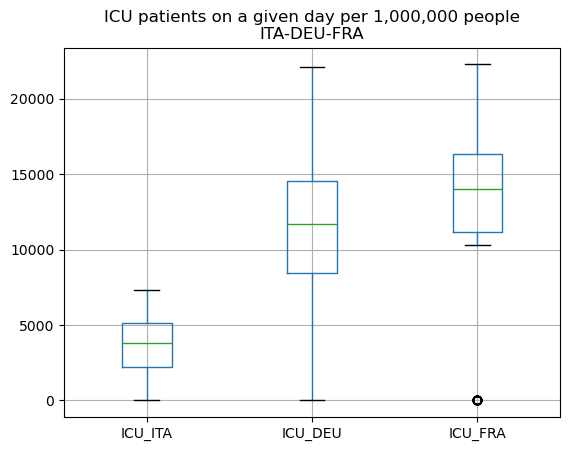

In [18]:
'''
Vedo cosa succede con "icu_patients_per_million"
icu_patients_per_million = NNumber of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
'''
df_ITA_ICU2=df_Italy_2022_2023[["date","iso_code","icu_patients_per_million"]].set_index("date")
df_DEU_ICU2=df_Germany_2022_2023[["date","iso_code","icu_patients_per_million"]].set_index("date")
df_FRA_ICU2=df_France_2022_2023[["date","iso_code","icu_patients_per_million"]].set_index("date")
#print(df_ITA_ICU2)
#print(df_DEU_ICU2)
#print(df_FRA_ICU2)
df_tot_ICU2=pd.concat([df_ITA_ICU2,df_DEU_ICU2,df_FRA_ICU2],axis=1)
df_tot_ICU2.columns=["iso_code_ITA","ICU_ITA","iso_code_DEU","ICU_DEU","iso_code_FRA","ICU_FRA"]
#print(df_tot)
df_tot_ICU2.boxplot(column=["ICU_ITA","ICU_DEU","ICU_FRA"]).set_title("ICU patients on a given day per 1,000,000 people\nITA-DEU-FRA")

• Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [19]:
'''
Ho deciso di creare un nuovo DataFrame e filtrare nuovamente per anno e per Paese.
Questo perché preferisco usare "iso_code" per la filtrazione in modo da poter raggruppare successivamente per "location". 
Infatti così posso stampare il nome intero della location invece che solo l'iso_code
'''
df1=tab_raw_excel
df1["year"]=df1["date"].dt.year
df1=df1.set_index(["iso_code","year"])
df1_Italy_2023=df1.loc["ITA",2023]
df1_Germany_2023=df1.loc["DEU",2023]
df1_France_2023=df1.loc["FRA",2023]
df1_Spain_2023=df1.loc["ESP",2023]

C:\Users\fra_p\AppData\Local\Temp\ipykernel_32732\3378014450.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1_Italy_2023=df1.loc["ITA",2023]
C:\Users\fra_p\AppData\Local\Temp\ipykernel_32732\3378014450.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1_Germany_2023=df1.loc["DEU",2023]
C:\Users\fra_p\AppData\Local\Temp\ipykernel_32732\3378014450.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1_France_2023=df1.loc["FRA",2023]
C:\Users\fra_p\AppData\Local\Temp\ipykernel_32732\3378014450.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  df1_Spain_2023=df1.loc["ESP",2023]


<Axes: xlabel='date'>

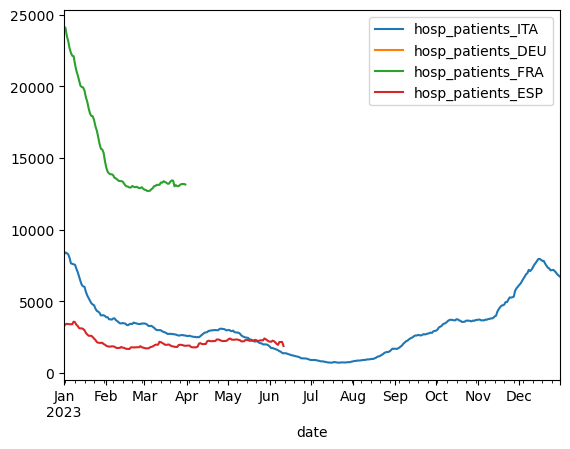

In [20]:
'''
Faccio un grafico per capire con che tipo di dato ho a che fare
hosp_patients = Number of COVID-19 patients in hospital on a given day
'''

df1_ITA_HOSP=df1_Italy_2023[["date","location","hosp_patients"]]
df1_ITA_HOSP.columns=["date","location","hosp_patients_ITA"]
df1_ITA_HOSP=df1_ITA_HOSP.set_index("date")
#print(df1_ITA_HOSP)

df1_DEU_HOSP=df1_Germany_2023[["date","location","hosp_patients"]]
df1_DEU_HOSP.columns=["date","location","hosp_patients_DEU"]
df1_DEU_HOSP=df1_DEU_HOSP.set_index("date")
#print(df1_DEU_HOSP)

df1_FRA_HOSP=df1_France_2023[["date","location","hosp_patients"]]
df1_FRA_HOSP.columns=["date","location","hosp_patients_FRA"]
df1_FRA_HOSP=df1_FRA_HOSP.set_index("date")
#print(df1_FRA_HOSP)

df1_ESP_HOSP=df1_Spain_2023[["date","location","hosp_patients"]]
df1_ESP_HOSP.columns=["date","location","hosp_patients_ESP"]
df1_ESP_HOSP=df1_ESP_HOSP.set_index("date")
#print(df1_ESP_HOSP)

df1_ITA_HOSP["hosp_patients_ITA"].plot(legend="bool")
df1_DEU_HOSP["hosp_patients_DEU"].plot(legend="bool")
df1_FRA_HOSP["hosp_patients_FRA"].plot(legend="bool")
df1_ESP_HOSP["hosp_patients_ESP"].plot(legend="bool")

In [23]:
df2_ITA_HOSP=df1_Italy_2023[["date","location","hosp_patients"]].set_index("date")
df2_DEU_HOSP=df1_Germany_2023[["date","location","hosp_patients"]].set_index("date")
df2_FRA_HOSP=df1_France_2023[["date","location","hosp_patients"]].set_index("date")
df2_ESP_HOSP=df1_Spain_2023[["date","location","hosp_patients"]].set_index("date")

df2_tot_HOSP=pd.concat([df2_ITA_HOSP, df2_DEU_HOSP, df2_FRA_HOSP,df2_ESP_HOSP])
df2_tot_HOSP.columns=["location","hosp_patients"]
#print(df2_tot_HOSP)
df2_tot_HOSP_sum=pd.DataFrame(df2_tot_HOSP.groupby("location")["hosp_patients"].sum())
#df1_tot_HOSP_sum=pd.DataFrame(df1_tot_HOSP_sum)
print(df2_tot_HOSP_sum)

          hosp_patients
location               
France    1382574.00000
Germany         0.00000
Italy     1175272.00000
Spain      354602.00000


<Axes: xlabel='date'>

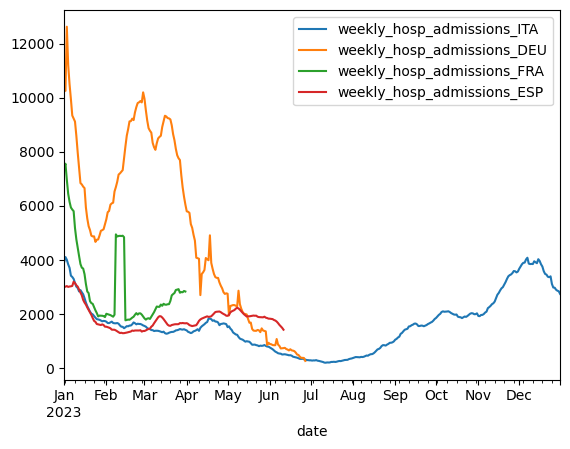

In [32]:
'''
La Germania non ha nessun dato in "hosp_patients" e in "hosp_patients_per_million"
Verifico se ci sono dei dati utili nelle "weekly_hosp_admission"
Faccio un grafico per capire con che tipo di dato ho a che fare
weekly_hosp_admissions = Number of COVID-19 patients newly admitted to hospitals in a given week (reporting date and the preceeding 6 days)
'''

df3_ITA_HOSP=df1_Italy_2023[["date","location","weekly_hosp_admissions"]]
df3_ITA_HOSP.columns=["date","location","weekly_hosp_admissions_ITA"]
df3_ITA_HOSP=df3_ITA_HOSP.set_index("date")
#print(df3_ITA_HOSP)

df3_DEU_HOSP=df1_Germany_2023[["date","location","weekly_hosp_admissions"]]
df3_DEU_HOSP.columns=["date","location","weekly_hosp_admissions_DEU"]
df3_DEU_HOSP=df3_DEU_HOSP.set_index("date")
#print(df3_DEU_HOSP)

df3_FRA_HOSP=df1_France_2023[["date","location","weekly_hosp_admissions"]]
df3_FRA_HOSP.columns=["date","location","weekly_hosp_admissions_FRA"]
df3_FRA_HOSP=df3_FRA_HOSP.set_index("date")
#print(df3_FRA_HOSP)

df3_ESP_HOSP=df1_Spain_2023[["date","location","weekly_hosp_admissions"]]
df3_ESP_HOSP.columns=["date","location","weekly_hosp_admissions_ESP"]
df3_ESP_HOSP=df3_ESP_HOSP.set_index("date")
#print(df3_ESP_HOSP)

df3_ITA_HOSP["weekly_hosp_admissions_ITA"].plot(legend="bool")
df3_DEU_HOSP["weekly_hosp_admissions_DEU"].plot(legend="bool")
df3_FRA_HOSP["weekly_hosp_admissions_FRA"].plot(legend="bool")
df3_ESP_HOSP["weekly_hosp_admissions_ESP"].plot(legend="bool")

In [65]:
#Verifico se ci sono dei dati utili nelle "weekly_hosp_admission"
'''
weekly_hosp_admissions = Number of COVID-19 patients newly admitted to hospitals in a given week (reporting date and the preceeding 6 days)
'''

df1_ITA_HOSP2=df1_Italy_2023[["date","location","weekly_hosp_admissions"]].set_index("location").reset_index()
df1_DEU_HOSP2=df1_Germany_2023[["date","location","weekly_hosp_admissions"]].set_index("location").reset_index()
df1_FRA_HOSP2=df1_France_2023[["date","location","weekly_hosp_admissions"]].set_index("location").reset_index()
df1_ESP_HOSP2=df1_Spain_2023[["date","location","weekly_hosp_admissions"]].set_index("location").reset_index()

#print(df1_ITA_HOSP2)
#print(df1_ITA_HOSP)
#print(df1_DEU_HOSP2)
#print(df1_FRA_HOSP2)
#print(df1_ESP_HOSP2)
print(df1_ITA_HOSP2.loc[7,"weekly_hosp_admissions"]-df1_ITA_HOSP2.loc[6,"weekly_hosp_admissions"])
print(df2_ITA_HOSP.reset_index().loc[1,"hosp_patients"]-df2_ITA_HOSP.reset_index().loc[0,"hosp_patients"])

-72.0
128.0


In [ ]:
Ci sono più dati, andrebbe indagato meglio come utilizzarli